# Final Project DS 3001

## 1. Idea Development

#### Data Information

The dataset comprises information from a survey conducted on students taking math and Portuguese language courses in a secondary school. It includes various socio-demographic attributes and academic performance indicators. There are 382 students that are observed in this dataset. Here are some key features:

**Socio-Demographic Variables:**
- School: Gabriel Pereira (GP) or Mousinho da Silveira (MS)
- Sex: Male (M) or Female (F)
- Age: Student's age (15 to 22)
- Address: Urban (U) or Rural (R)
- Family Size: Less or equal to 3 (LE3) or greater than 3 (GT3)
- Parent's Cohabitation Status: Living together (T) or Apart (A)

**Academic Performance Variables:**
- Extra Educational Support (schoolsup): Yes or No
- Family Educational Support (famsup): Yes or No
- Extra Paid Classes (paid): Yes or No
- Extracurricular Activities (activities): Yes or No
- Attended Nursery School (nursery): Yes or No
- Aspiration for Higher Education (higher): Yes or No
- Internet Access at Home (internet): Yes or No


#### Background Research



There are many factors that can play a role on a student's academic performance.

We will break these factors up into 5 main subgroups.

1. Socioeconomic Factors:
- Family income, parental education level, and access to educational resources at home can all play a role on a student's academic performance
- If education is highly valued by parents, it is most likely to be valued by the student.
- Additionally, financial stress can place burdens on students that may cause strain on acadmemic success. 

2. Demographic Factors
- Gender, age, and ethnicity can also all have impacts on final grades. 
- Gender and race sterotypes may play a role in classroom settings and reflect on acadmic performance.

3. Educational Environment:
- The environment of the school, quality of teachers, class size, student-teacher ratio, and avaliablilty of extracurricular activities can all also affect grades.
- This has to do with a student's attitude toward school and academics. 

4. Student characteristics:
- Studying habits, attendance, and prior academic performances are all relevant to current grades.
- These varaibles further define a student's attitude and effort to learning and school.

5. Health and Well-being:
- Physical and mental health as well as nutrition and sleep can all be vital in academic performance.
- There are many studies linking sleep and nutrition to healtheir brain activity. 
- Stress can also be crippling for students. 


We evaluate the final grade while looking at the studens' freuqency going out with friends (variable:goout), workday alcohol consumption (variable: Dalc), and weekend alcohol consumption(variable: Walc).  In backround research, we concluded that these factors tend to have an effect on school on student grades.  Greater alcohol consumption and spending time with friends tends to result in lower academic scores.  

Refrences below.


#### Research Question: Using the student dataset, can we predict a student's final grade using kNN?

In [1]:
### Import Libraries ### 

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np
import random
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

In [3]:
### Load in Data ### 
import os

student = pd.read_csv('student-mat.csv',  encoding="latin-1")
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## 2. Data Prep and Problem Exploration

### Summary Statistics

In [4]:
## Give First Look at Dataset and Variable Types ### 

student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
### Retrieve Dimensions of Dataset ###

student.shape

(395, 33)

In [6]:
### Remove Unecessary and Redundant Columns ###

to_drop = [1,3,5,10,12,19]
student1 = student.drop(student.columns[to_drop], axis=1)
student1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   age         395 non-null    int64 
 2   famsize     395 non-null    object
 3   Medu        395 non-null    int64 
 4   Fedu        395 non-null    int64 
 5   Mjob        395 non-null    object
 6   Fjob        395 non-null    object
 7   guardian    395 non-null    object
 8   studytime   395 non-null    int64 
 9   failures    395 non-null    int64 
 10  schoolsup   395 non-null    object
 11  famsup      395 non-null    object
 12  paid        395 non-null    object
 13  activities  395 non-null    object
 14  higher      395 non-null    object
 15  internet    395 non-null    object
 16  romantic    395 non-null    object
 17  famrel      395 non-null    int64 
 18  freetime    395 non-null    int64 
 19  goout       395 non-null    int64 
 20  Dalc      

In [7]:
## Replace NULL Values ###

student1.replace('NULL', np.nan, inplace=True)

### Exploratory Data Analysis 

#### Graph 1: Correlation Heatmap 

The first graph we constructed to explore the data was a correlation heatmap. This correlation graph allows us to see all of the levels of correlation between every one of our used variables. 

This type of graph uses colors to represent the strength and riection of correlation. 

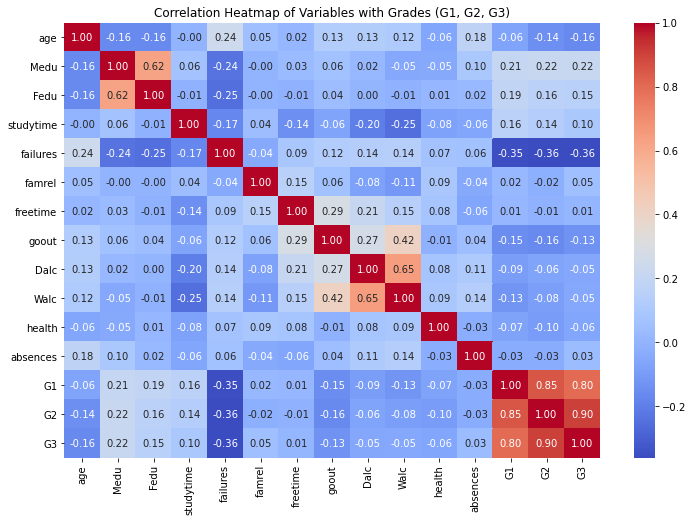

In [21]:
correlation_matrix = student1.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap of Variables with Grades (G1, G2, G3)')
plt.show()

Based on the results of our correlation heatmap above, we can observe all correlations of varaibles. The varaibles we are most interested in their correlation are the grades, G1, G2, G3. Looking exclusively at those varaibles, we saw the largest marginal correlatins with the other grades, and the number of failures, age, medu (mothers education, and fedu (father's education). 

#### Graph 2 : Mean G3 scores by correlated variables

The second graph we constructed to observe our data were boxplots of varaibles correlated to grades.

The varaibles we chose to display were the number of past class failures, the age of the student, the level of education of the student's mother, as well as alcohol consumption of the student.

We chose these varaibles because they displayed interesting correlations in the heatmap above. Additionally, we read some studies about alcohol consumptions effects on school performance. These articles are linked in the references. 

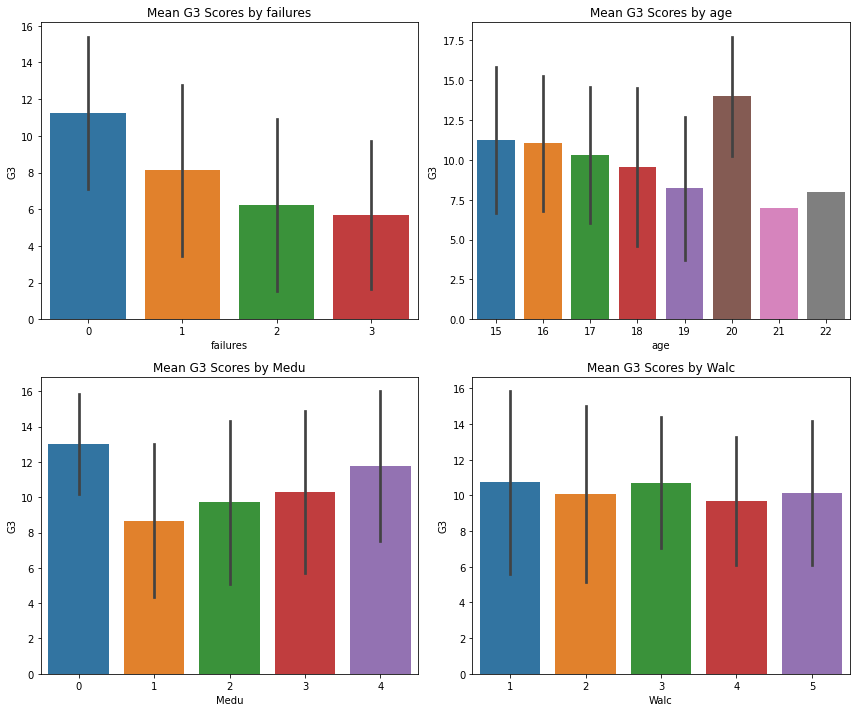

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Variables to plot
variables = ['failures', 'age', 'Medu', 'Walc']

# Iterate through the grid and plot each variable
for i, variable in enumerate(variables):
    row = i // 2
    col = i % 2
    sns.barplot(x=variable, y='G3', data=student1, ci='sd', ax=axes[row, col])
    axes[row, col].set_title(f'Mean G3 Scores by {variable}')

# Adjust layout
plt.tight_layout()
plt.show()

Within the bar plots above, we are able to see the differences in average final grades with each level of the chosen variables. Some of these varaibles show a decent amount of variation between levels. 

The first bar plot shows the number of past failed classes. It is clear that students with more past failures tend to have lower final grades. This makes sense intuitively. 

The second shows age. Final grade score tends to decrease as age increases, with the exception of 20 year olds. This may be because people who are older may have been held back or have a hard time passing school.

The third graph displays mother's education level. Student's whose mothers have no education have the highest final grades. In general, this value seems unlikely as I cannot imagine many mothers not even going to the 4th grade, which is displayed by a value of 1. Perhaps there was missing data that was assigned to 0. Besides this value, the final grade scores seem to increase as mothers education increases.

The last graph displays weekend alcohol consumption. There does not seem to be an obvious trend within these values. 

## 3. Solution Development

### Discussion of Method

We are using a KNN model because they can be used to identify patterns and trends in data and assess how specific variables may affect the final grade score. KNN models are also sensitive to noisy data with outliers, which helps us because we did not collect this data ourselves and cannot speak for its accuracy. 

### kNN Model

In [89]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
student1[["goout", "Dalc", "Walc"]] = StandardScaler().fit_transform(student1[["goout", "Dalc", "Walc"]])
X = student1[["goout", "Dalc", "Walc"]]
y = student1['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_tune, X_test, y_tune, y_test = train_test_split(X_test,y_test,  train_size = 0.50, stratify = y_test,random_state=49)

# Initialize the k-NN regressor
neigh = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

neigh.fit(X_train, y_train)

# Make predictions on the test set
y_pred = neigh.predict(X_test)
accuracy = neigh.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Accuracy: {accuracy}')

Mean Squared Error: 22.17133333333334
Accuracy: -0.08476216363142175


**Mean Squared Error Interpretation** 
- In this specific context, the MSE of approximately 22.17 indicates a notable average squared difference between the model's predictions and the actual grades. This suggests that the model might not effectively capture the underlying patterns in the data, leading to predictions that deviate significantly from the true values in the dataset.

**Accuracy Interpretation**
- The negative accuracy of approximately -0.08 implies that the model's performance is inferior to a basic horizontal line representing the mean of the target variable. This score indicates that the model has limited explanatory power for the chosen features, illustrating an inability to effectively capture the complexity of the relationship between the three selected predictors and the final grades. The negative accuracy highlights limitations in the model's ability to provide meaningful insights into the factors influencing student performance.


#### Get the best K value

In [90]:
def chooseK(k, X_train, y_train, X_test, y_test):
    random.seed(1)
    print("calculating... ", k, "k")    # I'll include this so you can see the progress of the function as it runs
    class_knn = KNeighborsRegressor(n_neighbors=k)
    class_knn.fit(X_train, y_train)
    
    # calculate accuracy
    accu = class_knn.score(X_test, y_test)
    return accu

test = pd.DataFrame({'k':list(range(1,22,2)), 
                     'accu':[chooseK(x, X_train, y_train, X_test, y_test) for x in list(range(1, 22, 2))]})
test = test.sort_values(by=['accu'], ascending=False)
test


calculating...  1 k
calculating...  3 k
calculating...  5 k
calculating...  7 k
calculating...  9 k
calculating...  11 k
calculating...  13 k
calculating...  15 k
calculating...  17 k
calculating...  19 k
calculating...  21 k


,k,accu
10,21,0.051007
9,19,0.045482
7,15,0.013250
8,17,0.009893
3,7,0.008459
6,13,0.008383
0,1,0.002718
5,11,-0.020054
4,9,-0.034379
2,5,-0.084762


According to the above output, the value of k that provides the highest accuracy in the context of our problem is 21. Because 21 has the highest accuracy, it is suggesting that considering 21 nearest neighbors provides the best predictive performance on the given dataset. The accuracy. 0.051, which suggests that the model can explain about 5.1% of the variance in the final grades (G3) of students based on the features provided. In general larger k values lead to more stable models with higher bias but lower varaince. 

## 4. Solution Deployment

### Implementing Best k Value

In [91]:
final_model = KNeighborsRegressor(n_neighbors=21)
final_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test)


### Further Evaluation of kNN Model

In [92]:
score = final_model.score(X_test, y_test)
print(f'Score: {score}')
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Score: 0.051006540153435975
Mean Squared Error: 19.396371882086164
Root Mean Squared Error: 4.404131228981053
Mean Absolute Error: 3.423809523809524


**Score Interpretation**

The score our model got, 0.051, is a relatively low R squared value.  This suggests that our model is not the most predicitve when looking at what has an effect on students' grades. 

**Mean Squared Error Interpretation**

The mean squared error is the difference between the predicted and actual values.  Our mean squared error of 19.396 is a relatively high number, again, suggesting that our model might not be the most predictive.  

**Root Mean Squared Error Interpretation**

Our root mean sqaured error of 4.04 is relatively large, suggesting not the most precise model.  We want this value minimized.

**Mean Absolute Error Interpretation**

Finally, our mean absolute error of 3.424 also suggests room for improvement in the model chosen to predict student performace.  

### Conclusion

In conclusion, our model and factors did not do the more accurate job at predicting student performance.  There are clearly many other factors that could go in to someone's school performace.  If we were to use this same data again and run the same model, we could look into highlighting different variables in order to get more accurate results.  

### Future Analysis

There are other models besides the KNN model that may be helpful to look at to strengthen a model to determine student's academic performance based on our variables.

#### Decision Trees and Random Forests:
These two models could reveal non-linear relationships between our variables and the student's final grades. We also could observe the feature importances.

#### Cluster Analysis:
Cluster analysis would help us split students into groups based on similar variables. Perhaps there would be clear clusters of types of students that link to grades they typically get. 

#### Regression:
We could use a regression model to look at the linear relationships between variables and the final grades. 

Overall, we see that there are many different paths to take when trying to determine a model to predict student academic performance. 


### References



Background Research:

El Ansari, Walid, et al. “Is Alcohol Consumption Associated with Poor Academic Achievement in University Students?” International Journal of Preventive Medicine, U.S. National Library of Medicine, Oct. 2013, www.ncbi.nlm.nih.gov/pmc/articles/PMC3843305/. 

Athman, Julie, and Martha C. Monroe. "The effects of environment-based education on students’ achievement motivation." Journal of interpretation research 9.1 (2004): 9-25.
https://journals.sagepub.com/doi/abs/10.1177/109258720400900102?casa_token=-vCkmjKUDeQAAAAA:lTA9e1yQCHxRdwbD7ccN8hxj7GOztbHjWkiNdtZSg2bTG6xODr0SowyH0VlX-VubBsZF9fZrMJDh

Brännlund, Annica, Mattias Strandh, and Karina Nilsson. "Mental-health and educational achievement: the link between poor mental-health and upper secondary school completion and grades." Journal of Mental Health 26.4 (2017): 318-325.
https://www.tandfonline.com/doi/abs/10.1080/09638237.2017.1294739?casa_token=eVzVv5ZYEeMAAAAA:2kS_8wtCeq_yfoVdmLsEgSH5_rQznXWYMm1OIEUzfTT6C34iUflSaJvtXr6NwwD76ov3XmgbJNtu

Capraro, Mary Margaret, Robert M. Capraro, and Bettie Barrett Wiggins. "An Investigation of the Effects of Gender, Socioeconomic Status, Race and Grades on Standardized Test Scores." (2000). 
https://eric.ed.gov/?id=ED444867

Carvalho, Renato G., and Rosa F. Novo. "Family socioeconomic status and student adaptation to school life: Looking beyond grades." (2012).
https://repositorio.ual.es/bitstream/handle/10835/1889/Art_28_751_eng.pdf?sequenc

Makongho, Anne-Marie. Alcohol Use and College Student’s Performance 1 - Minds.Wisconsin.Edu, University of Wisconsin, 30 Mar. 2018, minds.wisconsin.edu/bitstream/handle/1793/78353/MakonghoAnne-Marie.pdf. 

Tate, Emily. “Study Confirms Alcohol and Marijuana Linked with Decline in Student Grades.” Higher Education News, Events and Jobs, Inside Higher Ed, 8 Mar. 2017, www.insidehighered.com/news/2017/03/09/study-confirms-alcohol-and-marijuana-linked-decline-student-grades#:~:text=The%20researchers%20found%20that%20although,an%20average%20GPA%20of%203.03. 

Data: https://data.world/data-society/student-alcohol-consumption/workspace/project-summary?agentid=data-society&datasetid=student-alcohol-consumption
(contains description of all variables meanings)